# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [68]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
bc2 = pd.read_csv("bc2.csv")
bc2.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [11]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [7]:
bc2.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [22]:
bc2.set_index('ID', inplace=True)
bc2.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


### Check Missing Values

In [23]:
bc2.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [13]:
bc2["Bare Nuclei"][bc2['Bare Nuclei']=='?'].count()

16

In [14]:
#convert Bare Nuclei to int
bc2.loc[bc2['Bare Nuclei'] == '?','Bare Nuclei'] = '1'


### Find the distribution of target variable (Class) 

In [15]:
bc2.groupby('Class').count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

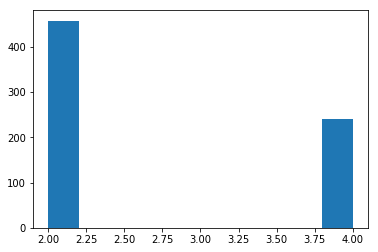

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(bc2['Class'])

### convert the datatype of Bare Nuclei to `int`

In [ ]:
bc2['Bare Nuclei'] = bc2['Bare Nuclei'].astype('int64')

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

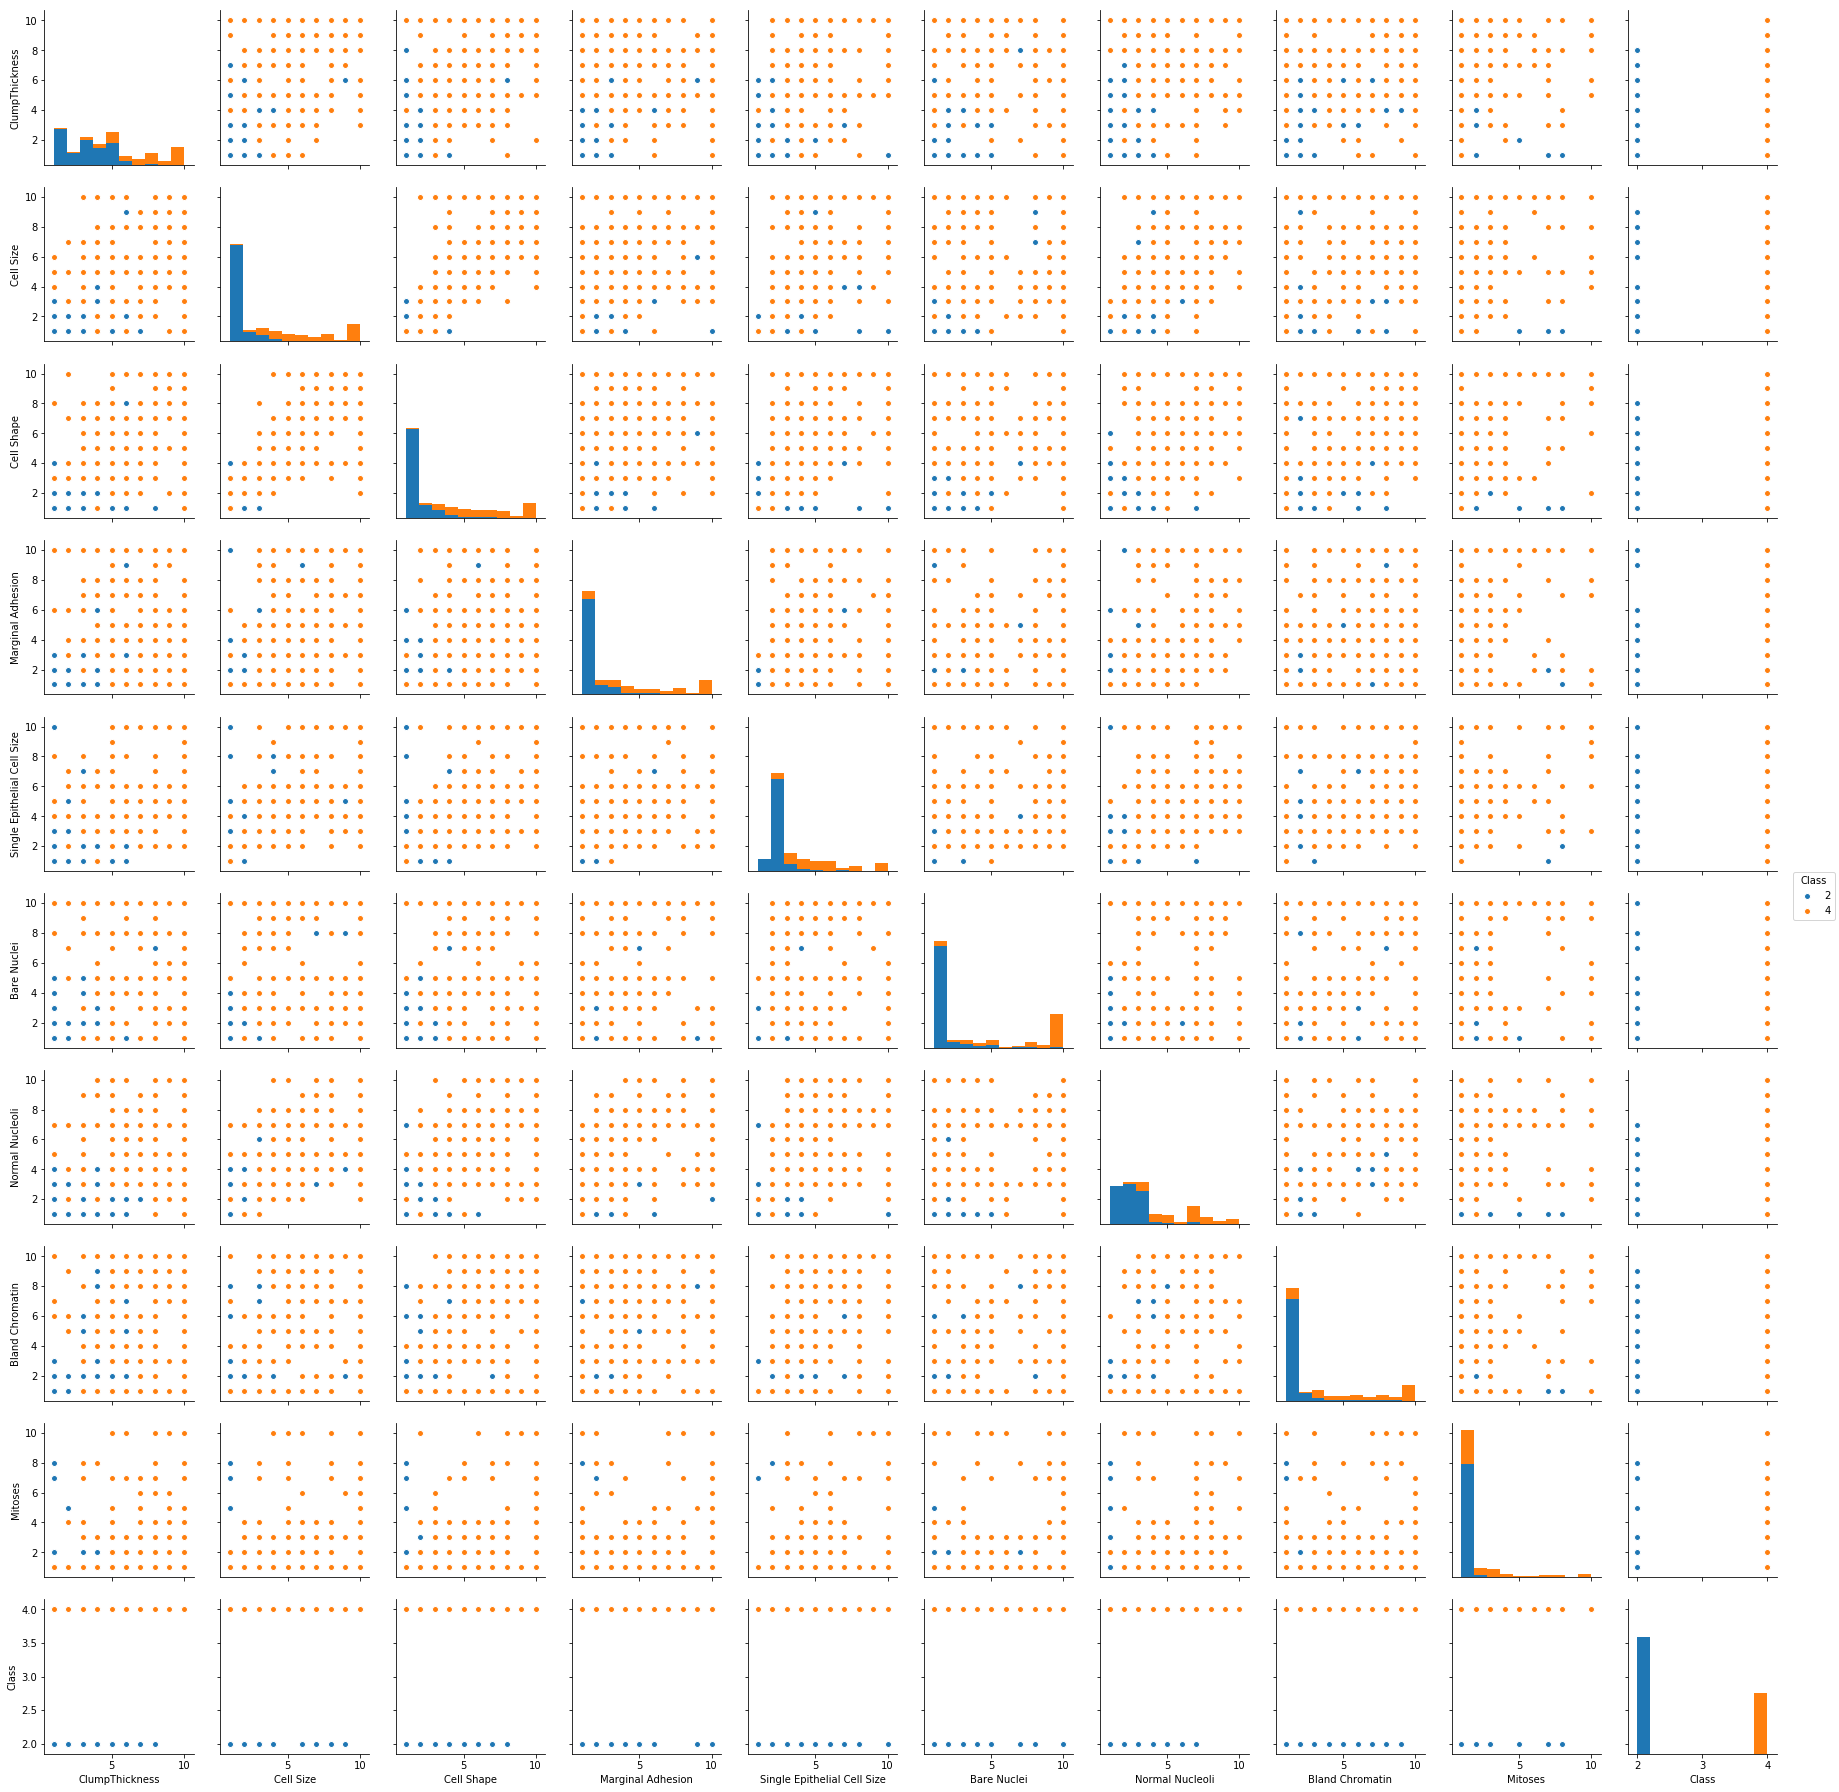

In [24]:
import seaborn as sns
sns.pairplot(bc2, hue='Class')
#class does not show significant separation across features
# Cell Size and Cell Shape are highly correlated. We can drop Cell Size


In [25]:
bc3 = bc2.drop('Cell Size', axis=1)

### Divide the dataset into feature set and target set


In [26]:
target = bc3['Class']
features = bc3.drop('Class', axis=1)

### Standardization of Data

In [69]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
scaled_data = std_scale.fit_transform(features.values)

In [43]:
bc4 = pd.DataFrame(scaled_data, index=features.index, columns=features.columns)
bc4.head()

,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ID,,,,,,,,
1000025,0.206936,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1002945,0.206936,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
1015425,-0.503866,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
1016277,0.562336,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
1017023,-0.148465,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


### Convariance Matrix

In [49]:
import numpy as np
covar = np.cov(bc4.T)

### Eigen Values and Vectors

In [50]:
eig_vals, eig_vecs = np.linalg.eig(covar)

### Sort the Eigen values

In [51]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)

### Explained Variance

In [52]:
total = eig_vals.sum()
variance_explained = eig_vals*100/total
#variance_explained.sort(reverse=True)
var = sorted(variance_explained,reverse=True)

### Plot the Explained Variance

<Container object of 8 artists>

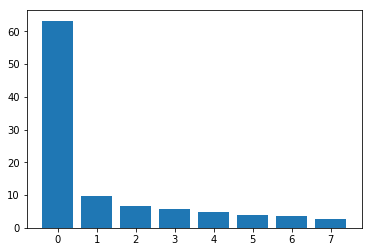

In [56]:
plt.bar(range(8),var)

In [55]:
var

[63.23952882203391,
 9.663405245423439,
 6.7337328818833395,
 5.6558764918467075,
 4.694301783832495,
 3.7857693932511305,
 3.6267077307007387,
 2.6006776510282448]

### Do PCA on feature set using sklearn

In [39]:
from sklearn.decomposition import PCA


In [67]:
pcamodel = PCA(n_components=8)
pcamodel.fit(bc4)
pcamodel.explained_variance_ratio_


array([0.63239529, 0.09663405, 0.06733733, 0.05655876, 0.04694302,
       0.03785769, 0.03626708, 0.02600678])

### Plot 3d-plot of data distribution on first three major PCA dimensions


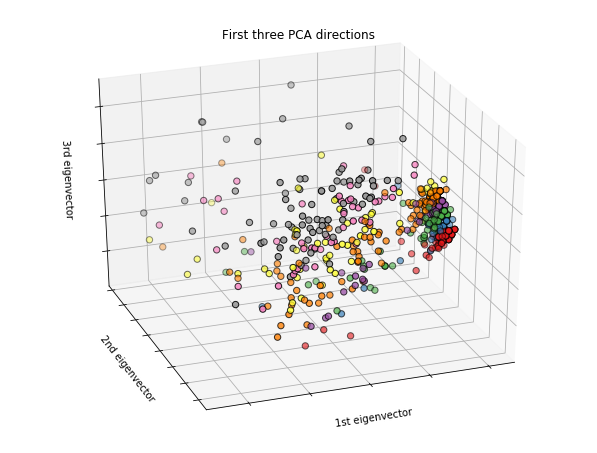

In [60]:
X_test_reduced = PCA(n_components=3).fit_transform(bc4) 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], X_test_reduced[:, 2], c=pd.DataFrame(bc4).iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Use Logistic Regression model on the dataset under 2 conditions:
1. With all the atttributes
2. With reduced number of attributes

Compare the accuracy of the model under both the cases

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc4,target, test_size = 0.3, random_state = 5)

In [73]:
pcamodel = PCA(n_components=8)
pcamodel.fit(X_train)
X_train = pcamodel.transform(X_train)
X_test = pcamodel.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9476190476190476
[[133   6]
 [  5  66]]


In [ ]:
#use only first 3 attributes

In [77]:
pcamodel = PCA(n_components=3)
pcamodel.fit(X_train)
X_train = pcamodel.transform(X_train)
X_test = pcamodel.transform(X_test)

In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9428571428571428
[[133   6]
 [  6  65]]


In [ ]:
#Accuracy of the two models is very similar